In [6]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

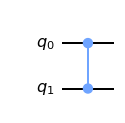

In [12]:
oracle = QuantumCircuit(2, name='oracle') #oracle circuit is the blackbox input operation
oracle.cz(0,1)
oracle.to_gate()
oracle.draw(output='mpl')

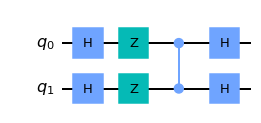

In [13]:
diffuser = QuantumCircuit(2, name='diffuser')
diffuser.h([0,1])
diffuser.z([0,1])
diffuser.cz(0,1)
diffuser.h([0,1])
diffuser.to_gate()
diffuser.draw(output='mpl')

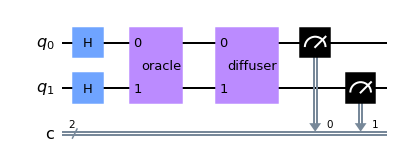

In [15]:
grover = QuantumCircuit(2,2)
grover.h([0,1])
grover.append(oracle, [0,1])
grover.append(diffuser, [0,1])
grover.measure([0,1],[0,1])
grover.draw(output='mpl')

In [16]:
sim = Aer.get_backend('qasm_simulator')
result = execute(grover, backend = sim, shots = 1).result() #result after one attempt
counts = result.get_counts()
print(counts)

{'11': 1}
